In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown

import os
import io
from PIL import Image
import requests
import multiprocessing as mp
import getpass

from geopy import distance

from sklearn.impute import SimpleImputer

from Functions import get_n_rowcol, cat_imputer

In [2]:
%matplotlib inline

In [3]:
data_dict = {}
for file in os.scandir('data'):
    data_dict[file.name.replace('.csv', "")] = pd.read_csv(file)

In [4]:
for key in data_dict.keys():
    display(Markdown(f"**{key}**"))
    display(data_dict[key].head())
    display(data_dict[key].shape)
    display(Markdown(f"---"))

**olist_customers_dataset**

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


(99441, 5)

---

**olist_geolocation_dataset**

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


(1000163, 5)

---

**olist_orders_dataset**

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


(99441, 8)

---

**olist_order_items_dataset**

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


(112650, 7)

---

**olist_order_payments_dataset**

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


(103886, 5)

---

**olist_order_reviews_dataset**

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


(99224, 7)

---

**olist_products_dataset**

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


(32951, 9)

---

**olist_sellers_dataset**

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


(3095, 4)

---

**product_category_name_translation**

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


(71, 2)

---

In [5]:
shapes = []
for key in data_dict.keys():
    shapes.append({'table': key,
                   'size': data_dict[key].shape[0]})

pd.DataFrame(shapes).sort_values(by='size', ascending=False)

,table,size
1,olist_geolocation_dataset,1000163
3,olist_order_items_dataset,112650
4,olist_order_payments_dataset,103886
0,olist_customers_dataset,99441
2,olist_orders_dataset,99441
5,olist_order_reviews_dataset,99224
6,olist_products_dataset,32951
7,olist_sellers_dataset,3095
8,product_category_name_translation,71


Ces bases de données sont relationnelles, avec les liens suivants :

![](https://i.imgur.com/HRhd2Y0.png)

Notre objectif est d'obtenir une segmentation de la base clients. La base de donnée contenant les principales informations sur les clients est `olist_customers_dataset` (appelée `olist_order_customer_dataset` dans la diagramme ci-dessus).

Nous allons donc nous attacher à créer une basede données unique contenant toutes les informations disponibles par client, en nous servant de ces relations.

# 1. Exploration

## 1.1. Base clients

La base `olist_customers_dataset` contient deux variables contenant un identifiant client :
- **customer_id** : identifiant unique généré liant un client à une commande (chaque commande en génère un unique)
- **customer_unique_id** : identifiant unique du client, permettant d'anonymiser ses données

Le second identifie donc chaque client de manière unique, tandis que le premier permet de le lier aux commandes passées.

In [6]:
data_dict['olist_customers_dataset'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
def group_cat_to_other(data, variable, thresh=0.01):

    '''
    Regroupement des valeurs d'une variable categorielles dont
    la frequence d'apparition est inferieure a un plancher au
    sein d'une seule et meme categorie.

    Parametres :
    ------------
    - data : dataframe contenant les donnees a traiter
    - variables : nom de la colonne (str) dans data contenant la variable
    categorielle a traiter
    - thresh : valeur du plancher (float=fraction du total,
    int=nombre d'occurences)

    Resultat :
    ----------
    pd.Series contenant la variable categorielle traitee,
    et intitules des categories par ordre decroissant.
    '''

    data = data.copy()

    if type(thresh) == int:
        data_freq = data.value_counts(subset=variable)
    else:
        assert 0 < thresh < 1,\
            ("La fraction saisie doit etre comprise entre 0 et 1")
        data_freq = data.value_counts(subset=variable) / data.shape[0]

    mapping = data_freq < thresh
    data.loc[data[variable].isin(data_freq[mapping].index), variable] = 'other'

    order = data[variable].value_counts().index.tolist()
    order.remove('other')
    order.append('other')

    return data, order

In [8]:
thresh = 0.01

# Regroupement des villes avec peu de clients dans la base
data_fig, order = group_cat_to_other(
    data_dict['olist_customers_dataset']
    .drop_duplicates(subset='customer_unique_id'),
    'customer_city',
    thresh=thresh)

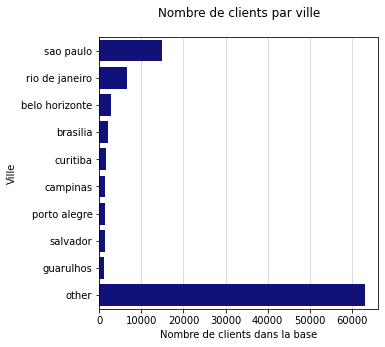

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='customer_city',
    order=order,
    color='darkblue'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de clients par ville', pad=20)
ax.set_xlabel('Nombre de clients dans la base')
ax.set_ylabel('Ville')

plt.show()

In [10]:
display(Markdown(
    f"La categorie `other` regroupe les villes contenant moins de\
    {thresh:.1%} des observations chacune, ce qui represente\
    {len(np.setdiff1d(data_dict['olist_customers_dataset']['customer_city'].unique(),order)):,d}\
    villes."))

La categorie `other` regroupe les villes contenant moins de    1.0% des observations chacune, ce qui represente    4,110    villes.

In [11]:
# Regroupement des Etats avec peu de clients dans la base
data_fig, order = group_cat_to_other(data_dict['olist_customers_dataset']
                                     .drop_duplicates(
                                         subset='customer_unique_id'),
                                     'customer_state',
                                     thresh=thresh)

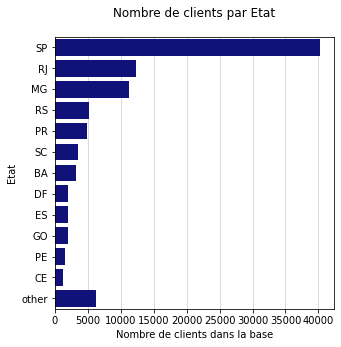

In [12]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='customer_state',
    order=order,
    color='darkblue'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de clients par Etat', pad=20)
ax.set_xlabel('Nombre de clients dans la base')
ax.set_ylabel('Etat')

plt.show()

In [13]:
n_other = len(
    np.setdiff1d(data_dict['olist_customers_dataset']['customer_state']
                 .unique(),
                 order))

display(Markdown(f"La categorie `autre` regroupe les Etat \
contenant moins de {thresh:.1%} des observations chacune, ce qui represente\
{n_other:,d} Etats."))

La categorie `autre` regroupe les Etat contenant moins de 1.0% des observations chacune, ce qui represente15 Etats.

## 1.2. Données de géolocalisation

La base `olist_geolocation_dataset` contient des données de géolocalisation par code postal. Nous pouvons observer la distribution des données par latitude et longitude.

In [14]:
data_dict['olist_geolocation_dataset'].head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


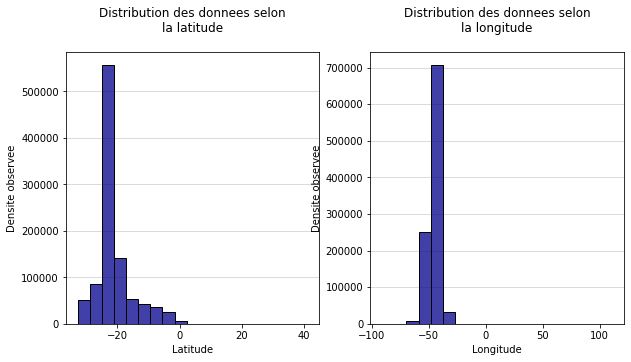

In [15]:
bins = round(1 + np.log2(data_dict['olist_geolocation_dataset'].shape[0]))

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for var, name, ax in zip(
    ['geolocation_lat', 'geolocation_lng'],
    ['Latitude', 'Longitude'],
    fig.axes
):

    sns.histplot(
        x=data_dict['olist_geolocation_dataset'][var],
        color='darkblue',
        bins=bins,
        ax=ax
    )

    ax.grid(visible=True, axis='y', color='lightgrey')

    ax.set_axisbelow(True)

    ax.set_title(f'Distribution des donnees selon\nla {name.lower()}', pad=20)
    ax.set_xlabel(name)
    ax.set_ylabel('Densite observee')

    ax.set_xlim(left=data_dict['olist_geolocation_dataset'][var].min(),
                right=data_dict['olist_geolocation_dataset'][var].max())

plt.show()

## 1.3. Données relatives aux commandes

Les base de données `olist_orders_dataset`, `olist_order_items_dataset` et `olist_order_payments_dataset` contiennent les informations sur les commandes passées, les produits qu'elles contiennent, et des informations sur le mode de paiement.

### 1.3.1. Vie de la commande

In [16]:
data_dict['olist_orders_dataset'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Cette base de données contient des informations sur la vie de la commande : de la date d'achat à la date de livraison, et inclut la date de livraison telle qu'estimée initialement.

Nous allons ajouter une variable correspondant au temps de livraison accepté par le client au moment de son achat, correspondant à la différence entre la date de livraison estimée et la date d'achat. Nous allons également observer la distribution des commandes disponibles dans notre base de données selon le mois et l'année.

In [17]:
# Conversion de la date d'achat au format datetime
data_dict['olist_orders_dataset'].loc[:, 'order_purchase_timestamp'] =\
    pd.to_datetime(
    data_dict['olist_orders_dataset']['order_purchase_timestamp'])

# Conversion de la date estimee de livraison au format datetime
data_dict['olist_orders_dataset'].loc[:, 'order_estimated_delivery_date'] =\
    pd.to_datetime(
    data_dict['olist_orders_dataset']['order_estimated_delivery_date'])

# Creation d'une variable de difference entre date d'achat et de livraison
data_dict['olist_orders_dataset']['order_purchase_to_delivery'] =\
    data_dict['olist_orders_dataset']['order_estimated_delivery_date'] -\
    data_dict['olist_orders_dataset']['order_purchase_timestamp']

data_dict['olist_orders_dataset']['order_purchase_to_delivery'] =\
    data_dict['olist_orders_dataset']['order_purchase_to_delivery'].dt.days

# Creation des variables heure, jour, mois et annee de la commande
data_dict['olist_orders_dataset']['order_purchase_hour'] =\
    data_dict['olist_orders_dataset']['order_purchase_timestamp'].dt.hour
data_dict['olist_orders_dataset']['order_purchase_day'] =\
    data_dict['olist_orders_dataset']['order_purchase_timestamp'].dt.dayofweek
data_dict['olist_orders_dataset']['order_purchase_month'] =\
    data_dict['olist_orders_dataset']['order_purchase_timestamp'].dt.month
data_dict['olist_orders_dataset']['order_purchase_year'] =\
    data_dict['olist_orders_dataset']['order_purchase_timestamp'].dt.year

Nous pouvons désormais visualiser la distribution de ces variables dans notre base de données.

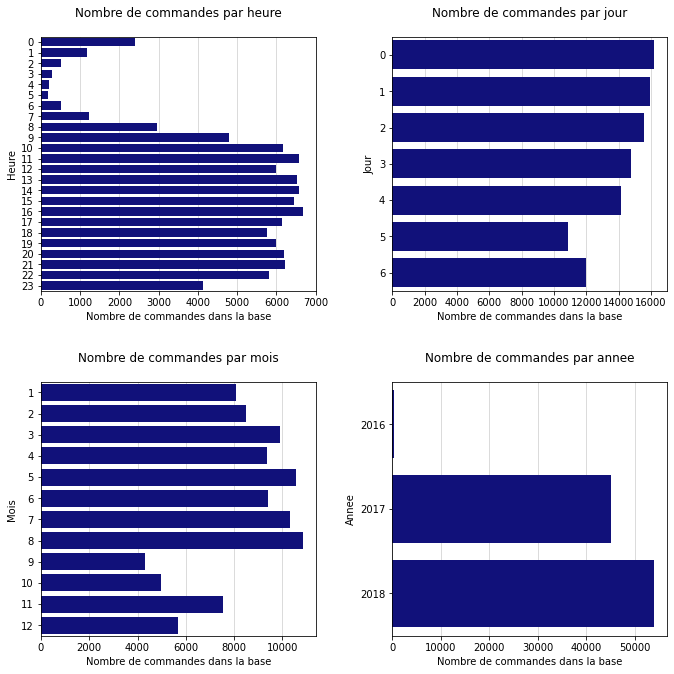

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

for var, name, ax in zip(
    ['order_purchase_hour',
     'order_purchase_day',
     'order_purchase_month',
     'order_purchase_year'],
    ['Heure', 'Jour', 'Mois', 'Annee'],
    fig.axes
):

    sns.countplot(
        data=data_dict['olist_orders_dataset'],
        y=var,
        color='darkblue',
        ax=ax
    )

    ax.grid(visible=True, axis='x', color='lightgrey')

    ax.set_axisbelow(True)

    ax.set_title(f'Nombre de commandes par {name.lower()}', pad=20)
    ax.set_xlabel('Nombre de commandes dans la base')
    ax.set_ylabel(name)

fig.tight_layout(pad=3)

plt.show()

In [19]:
date_min = data_dict['olist_orders_dataset']\
    .loc[:, 'order_purchase_timestamp'].min()
date_max = data_dict['olist_orders_dataset']\
    .loc[:, 'order_purchase_timestamp'].max()
time_diff = date_max-date_min
time_diff = round(time_diff.days/365)

display(Markdown(
    f"Nous notons que notre base de donnees couvre une periode allant du\
    {date_min:%d/%m/%Y} au {date_max:%d/%m/%Y}, \
    soit environ {time_diff:d} annees."))

Nous notons que notre base de donnees couvre une periode allant du    04/09/2016 au 17/10/2018,     soit environ 2 annees.

Nous pouvons également visualiser la distribution des temps de livraison des commandes.

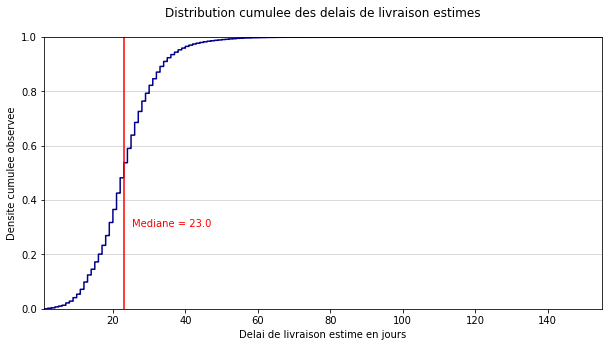

In [20]:
median = data_dict['olist_orders_dataset']['order_purchase_to_delivery']\
    .median()

fig, ax = plt.subplots(figsize=(10, 5))

sns.ecdfplot(
    data=data_dict['olist_orders_dataset'],
    x='order_purchase_to_delivery',
    color='darkblue'
)

ax.vlines(
    x=median,
    ymin=0,
    ymax=1,
    color='red'
)

ax.annotate(
    text=f"Mediane = {median:.1f}",
    xy=(median*1.1, 0.3),
    color='red'
)

ax.grid(visible=True, axis='y', color='lightgrey')

ax.set_axisbelow(True)

ax.set_xlim(left=data_dict['olist_orders_dataset']
            ['order_purchase_to_delivery'].min(),
            right=data_dict['olist_orders_dataset']
            ['order_purchase_to_delivery'].max())

ax.set_title('Distribution cumulee des delais de livraison estimes', pad=20)
ax.set_xlabel('Delai de livraison estime en jours')
ax.set_ylabel('Densite cumulee observee')

plt.show()

Nous pouvons enrichir la base de données en identifiant les périodes généralement liées à une consommation accrue, notamment sur les sites de e-commerce : Noël, Saint-Valentin, et les fêtes de mères, pères, et des enfants.

Pour ce faire, nous allons identifier les périodes d'achat associées comme correspondant aux deux semaines précédant 7 jours avant la date de la fête, à l'exception de Noël pour lequel le mois entier sera pris en compte.

In [21]:
dates_dict = [
    {'name': 'd_christmas', 'day_start': 15, 'month_start': 11,
     'day_end': 15, 'month_end': 12},
    {'name': 'd_valentines', 'day_start': 23, 'month_start': 5,
     'day_end': 5, 'month_end': 6},
    {'name': 'd_mothers', 'day_start': 22, 'month_start': 7,
     'day_end': 4, 'month_end': 8},
    {'name': 'd_fathers', 'day_start': 21, 'month_start': 4,
     'day_end': 4, 'month_end': 5},
    {'name': 'd_children', 'day_start': 22, 'month_start': 9,
     'day_end': 5, 'month_end': 10}
]

In [22]:
for date in dates_dict:

    data_dict['olist_orders_dataset'][date['name']] = False

    mapping_d_start =\
        data_dict['olist_orders_dataset']['order_purchase_day'] >=\
        date['day_start']
    mapping_m_start =\
        data_dict['olist_orders_dataset']['order_purchase_month'] ==\
        date['month_start']

    mapping_d_end =\
        data_dict['olist_orders_dataset']['order_purchase_day'] <=\
        date['day_end']
    mapping_m_end =\
        data_dict['olist_orders_dataset']['order_purchase_month'] ==\
        date['month_end']

    mapping =\
        (mapping_d_start & mapping_m_start) | (mapping_d_end & mapping_m_end)
    data_dict['olist_orders_dataset'].loc[mapping, date['name']] = True

In [23]:
d_events = [date['name'] for date in dates_dict]

In [24]:
sales_share_events = \
    data_dict['olist_orders_dataset'][d_events].sum() / \
    data_dict['olist_orders_dataset'].shape[0]
sales_share_events

d_christmas     0.057059
d_valentines    0.083105
d_mothers       0.085991
d_fathers       0.084935
d_children      0.042910
dtype: float64

In [25]:
display(Markdown(f"Sur cette base, environ \
{sales_share_events.sum():.0%} des commandes ont lieu \
durant des periodes associees a des fetes."))

Sur cette base, environ 35% des commandes ont lieu durant des periodes associees a des fetes.

### 1.3.2. Détail des produits

In [26]:
data_dict['olist_order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Cette base de données contient notamment des informations sur le nombre de produits par commande, le prix du produit et le prix de la livraison. Nous allons chercher à visualiser les distributions associées.

In [27]:
# Extraction du nombre de produits par commande, en considerant
# le max de l'id du produit dans la commande
data_fig =\
    data_dict['olist_order_items_dataset'][['order_id', 'order_item_id']]\
    .groupby('order_id').max()

# Si la commande contient plus de 5 produits,
# inclusion dans une categorie unique
mapping = data_fig['order_item_id'] >= 5
data_fig.loc[mapping, 'order_item_id'] = '>=5'

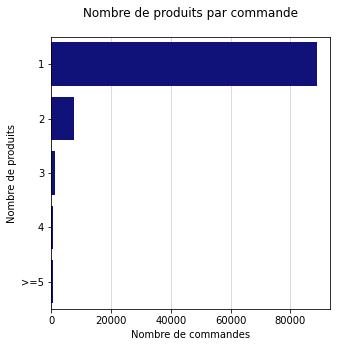

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='order_item_id',
    color='darkblue',
    order=[1, 2, 3, 4, ">=5"]
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de produits par commande', pad=20)
ax.set_xlabel('Nombre de commandes')
ax.set_ylabel('Nombre de produits')

plt.show()

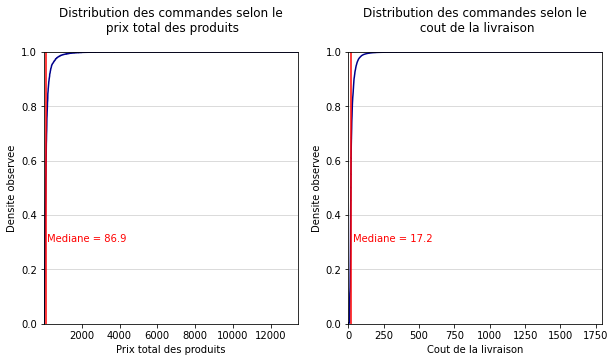

In [29]:
# Calcul des montants totaux par commande
data_fig =\
    data_dict['olist_order_items_dataset'][[
        'order_id', 'price', 'freight_value']]\
    .groupby('order_id').sum()
data_fig.head()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

for var, name, ax in zip(
    ['price', 'freight_value'],
    ['Prix total des produits', 'Cout de la livraison'],
    fig.axes
):

    sns.ecdfplot(
        x=data_fig[var],
        color='darkblue',
        ax=ax
    )

    median = data_fig[var].median()

    ax.vlines(
        x=median,
        ymin=0,
        ymax=1,
        color='red'
    )

    ax.annotate(
        text=f"Mediane = {median:.1f}",
        xy=(median*2, 0.3),
        color='red'
    )

    ax.grid(visible=True, axis='y', color='lightgrey')

    ax.set_axisbelow(True)

    ax.set_title(f'Distribution des commandes selon le\n {name.lower()}',
                 pad=20)
    ax.set_xlabel(name)
    ax.set_ylabel('Densite observee')

    ax.set_xlim(left=data_fig[var].min(),
                right=data_fig[var].max())

plt.show()

### 1.3.3. Données de paiement

In [30]:
data_dict['olist_order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Cette base de données contient des informations sur les moyens de paiement utilisés pour chaque commande. Nous pouvons visualiser la distribution de ces variables, et allons également visualiser la distribution croisée du nombre de mensualités en fonction du montant payé.

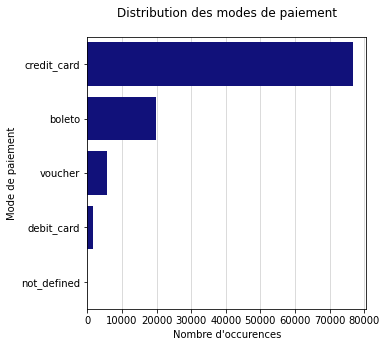

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_dict['olist_order_payments_dataset'],
    y='payment_type',
    color='darkblue'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Distribution des modes de paiement', pad=20)
ax.set_xlabel("Nombre d'occurences")
ax.set_ylabel('Mode de paiement')

plt.show()

In [32]:
# Extraction du nombre de modes de paiement par commande,
# en considerant le max de la sequence des modes
# de paiement dans la commande
data_fig =\
    data_dict['olist_order_payments_dataset'][[
        'order_id', 'payment_sequential']].groupby('order_id').max()

# Si la commande contient plus de 5 produits,
# inclusion dans une categorie unique
mapping = data_fig['payment_sequential'] >= 5
data_fig.loc[mapping, 'payment_sequential'] = '>=5'

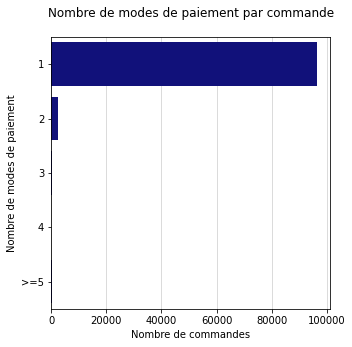

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='payment_sequential',
    color='darkblue',
    order=[1, 2, 3, 4, ">=5"]
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de modes de paiement par commande', pad=20)
ax.set_xlabel('Nombre de commandes')
ax.set_ylabel('Nombre de modes de paiement')

plt.show()

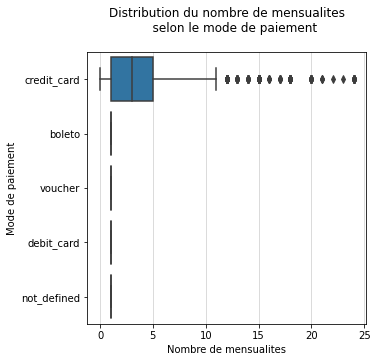

In [34]:
# Visualisation de la distribution du nombre de mensualites
# selon le mode de paiement
fig, ax = plt.subplots(figsize=(5, 5))

sns.boxplot(
    data=data_dict['olist_order_payments_dataset'],
    x='payment_installments',
    y='payment_type'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Distribution du nombre de mensualites\n\
    selon le mode de paiement',
             pad=20)
ax.set_xlabel("Nombre de mensualites")
ax.set_ylabel('Mode de paiement')

plt.show()

Nous pouvons remarquer que seules les cartes de crédit semblent permettre d'échelonner les paiements en plusieurs mensualités, et que certaines commandes indiquent 0 paiements. Nous nous intéressons à la date de ces dernières, au cas où elles seraient très récentes et n'auraient pas encore été réglées.

In [35]:
mapping =\
    data_dict['olist_order_payments_dataset']['payment_installments'] == 0
zero_orders =\
    data_dict['olist_order_payments_dataset'].loc[mapping, 'order_id']
mapping = data_dict['olist_orders_dataset']['order_id'].isin(zero_orders)
data_dict['olist_orders_dataset'].loc[mapping]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_to_delivery,order_purchase_hour,order_purchase_day,order_purchase_month,order_purchase_year,d_christmas,d_valentines,d_mothers,d_fathers,d_children
63782,744bade1fcf9ff3f31d860ace076d422,5e5794daaa13f73e2f1cdb4114529843,delivered,2018-04-22 11:34:42,2018-04-24 19:04:46,2018-04-24 03:14:34,2018-04-27 20:55:28,2018-05-16,23,11,6,4,2018,False,False,False,False,False
66368,1a57108394169c0b47d8f876acc9ba2d,48ebb06cf56dba9d009230cc751bb195,delivered,2018-05-15 16:25:14,2018-05-15 16:36:52,2018-05-17 12:37:00,2018-05-24 15:45:41,2018-06-06,21,16,1,5,2018,False,False,False,True,False


Ces commandes étant indiquées comme ayant été livrées, nous considérons qu'elles ont également été payées, et imputons ces valeurs à 0 par 1.

In [36]:
# Imputation des valeurs a 0 (nombre de mensualites / paiements)
# par 1 (paiement en 1 fois)
mapping =\
    data_dict['olist_order_payments_dataset']['payment_installments'] == 0
data_dict['olist_order_payments_dataset']\
    .loc[mapping, 'payment_installments'] = 1

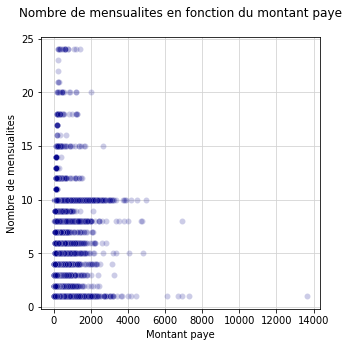

In [37]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(
    data=data_dict['olist_order_payments_dataset'],
    x='payment_value',
    y='payment_installments',
    color='darkblue',
    alpha=.2
)

ax.grid(visible=True, axis='both', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de mensualites en fonction du montant paye', pad=20)
ax.set_xlabel('Montant paye')
ax.set_ylabel('Nombre de mensualites')

plt.show()

La base de données `olist_order_reviews_dataset` contient des informations sur la note et les commentaires éventuels laissés par le client pour sa commande.

### 1.3.4. Notes et commentaires

In [38]:
data_dict['olist_order_reviews_dataset'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Cette base de données contient des éléments relatifs au score et aux commentaires laissés par commande, mais sans lien direct avec le produit auquel la note et le commentaire sont rattachés.

Nous commençons par visualiser la distribution des scores données.

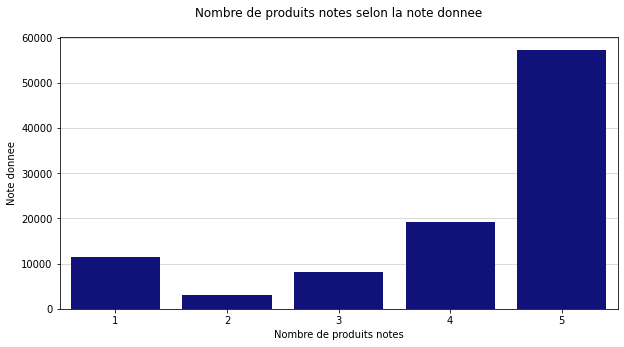

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=data_dict['olist_order_reviews_dataset'],
    x='review_score',
    color='darkblue'
)

ax.grid(visible=True, axis='y', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title(f'Nombre de produits notes selon la note donnee', pad=20)
ax.set_xlabel('Nombre de produits notes')
ax.set_ylabel('Note donnee')

plt.show()

Il pourrait être intéressant d'étudier les commentaires en profondeur, si nous disposions d'un ensemble de commentaires par produit. Compte tenu de nos données, il n'est possible de rattacher un commentaire à un produit précis que dans le cas des commandes contenant un seul produit.

## 1.4. Données relatives aux produits et vendeurs

La bases de données `olist_products_dataset` contient des informations sur les produits.

In [40]:
data_dict['olist_products_dataset'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Nous pouvons visualiser la distribution des différentes variables.

In [41]:
# Regroupement des types de produits apparaissant peu dans la base
data_fig, order = group_cat_to_other(data_dict['olist_products_dataset'],
                                     'product_category_name',
                                     thresh=thresh)

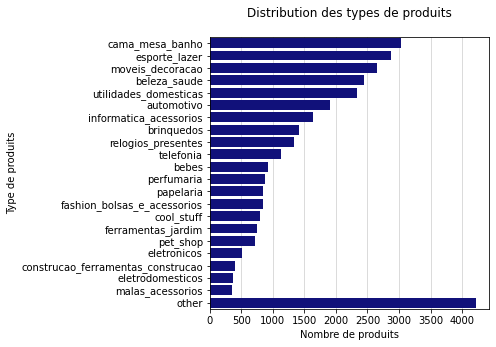

In [42]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='product_category_name',
    color='darkblue',
    order=order
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Distribution des types de produits', pad=20)
ax.set_xlabel('Nombre de produits')
ax.set_ylabel('Type de produits')

plt.show()

Nous ajoutons une colonne du volume du produit, en estimant que les dimensions correspondent à un paquet de forme pavé.

In [43]:
data_dict['olist_products_dataset']['product_vol_cm3'] =\
    data_dict['olist_products_dataset'][[
        'product_length_cm',
        'product_height_cm',
        'product_width_cm']].prod(axis=1)

In [44]:
num_cols = data_dict['olist_products_dataset'].dtypes == 'float'
num_cols = data_dict['olist_products_dataset'].columns[num_cols].tolist()
num_cols

['product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'product_vol_cm3']

In [45]:
nrows, ncols = get_n_rowcol(num_cols)

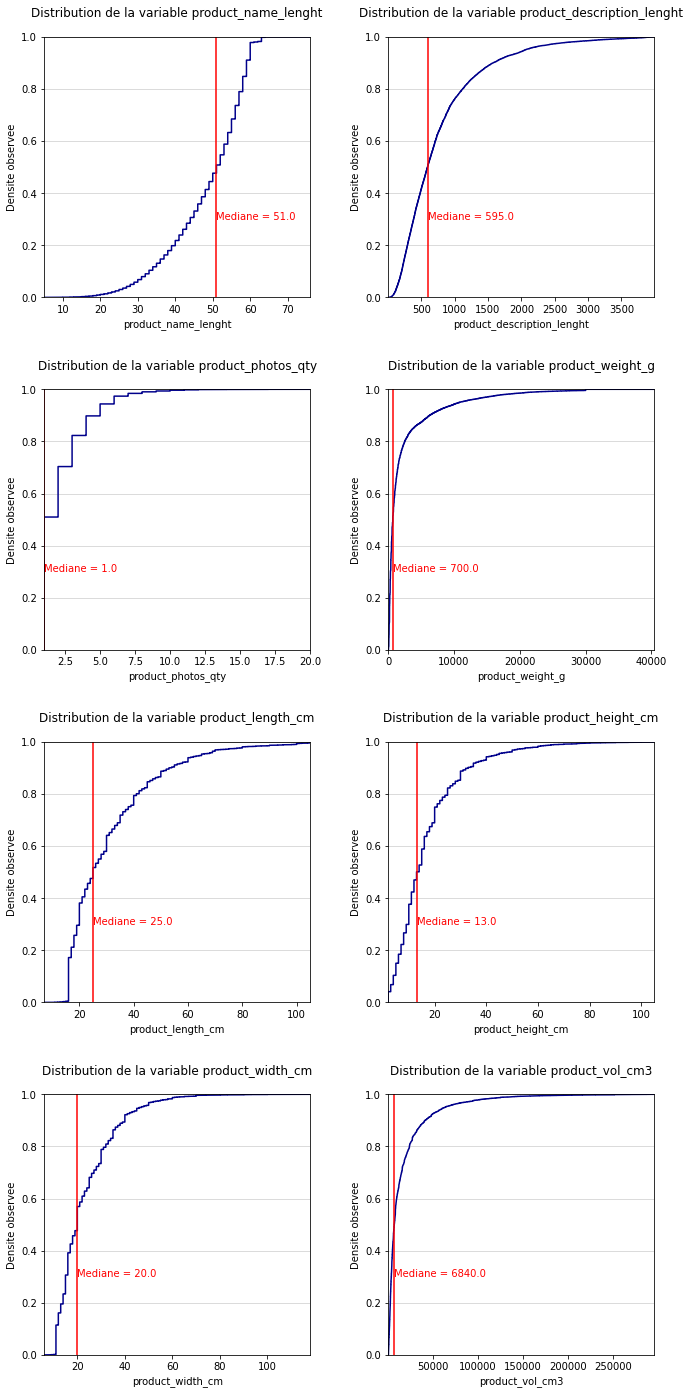

In [46]:
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))

for var, ax in zip(num_cols, fig.axes):

    sns.ecdfplot(
        x=data_dict['olist_products_dataset'][var],
        color='darkblue',
        ax=ax
    )

    median = data_dict['olist_products_dataset'][var].median()

    ax.vlines(
        x=median,
        ymin=0,
        ymax=1,
        color='red'
    )

    ax.annotate(
        text=f"Mediane = {median:.1f}",
        xy=(median, 0.3),
        color='red'
    )

    ax.grid(visible=True, axis='y', color='lightgrey')

    ax.set_axisbelow(True)

    ax.set_title(f'Distribution de la variable {var}', pad=20)
    ax.set_xlabel(var)
    ax.set_ylabel('Densite observee')

    ax.set_xlim(left=data_dict['olist_products_dataset'][var].min(),
                right=data_dict['olist_products_dataset'][var].max())

fig.tight_layout(pad=3)

plt.show()

Nous pouvons noter que cette base contient des données manquantes.

In [47]:
data_dict['olist_products_dataset'].isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
product_vol_cm3                 0
dtype: int64

Nous allons imputer ces valeurs manquantes par :
- La médiane pour les valeurs numériques
- Le mode pour les valeurs catégorielles

In [48]:
imputer_med = SimpleImputer(strategy='median')
imputer_mf = SimpleImputer(strategy='most_frequent')

In [49]:
num_cols = data_dict['olist_products_dataset']\
    .select_dtypes(include=[int, float]).columns

cat_cols = np.setdiff1d(
    data_dict['olist_products_dataset'].columns,
    num_cols)

In [50]:
# Imputation des variables numeriques
data_dict['olist_products_dataset'].loc[:, num_cols] =\
    imputer_med.fit_transform(data_dict['olist_products_dataset'][num_cols])
# Imputation des variables categorielles
data_dict['olist_products_dataset'].loc[:, cat_cols] =\
    imputer_mf.fit_transform(data_dict['olist_products_dataset'][cat_cols])

## 1.5. Données relatives aux vendeurs

La base de données `olist_sellers_dataset` contient des informations sur la localisation de chaque vendeur.

In [51]:
data_dict['olist_sellers_dataset'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Nous pouvons observer leur distribution.

In [52]:
# Regroupement des villes avec peu de vendeurs dans la base
data_fig, order = group_cat_to_other(data_dict['olist_sellers_dataset'],
                                     'seller_city',
                                     thresh=thresh)

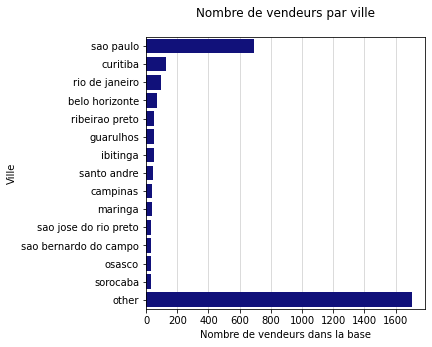

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='seller_city',
    order=order,
    color='darkblue'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de vendeurs par ville', pad=20)
ax.set_xlabel('Nombre de vendeurs dans la base')
ax.set_ylabel('Ville')

plt.show()

In [54]:
# Regroupement des Etats avec peu de vendeurs dans la base
data_fig, order = group_cat_to_other(data_dict['olist_sellers_dataset'],
                                     'seller_state',
                                     thresh=thresh)

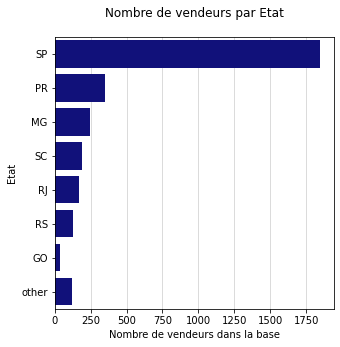

In [55]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(
    data=data_fig,
    y='seller_state',
    order=order,
    color='darkblue'
)

ax.grid(visible=True, axis='x', color='lightgrey')

ax.set_axisbelow(True)

ax.set_title('Nombre de vendeurs par Etat', pad=20)
ax.set_xlabel('Nombre de vendeurs dans la base')
ax.set_ylabel('Etat')

plt.show()

## 1.6. Traductions en anglais

La base de données `product_category_name_translation` donne une traduction des noms de catégories de produits en anglais.

# 2. Transformation de la base de données

Cette étape a pour but de consolider les données disponibles au sein des différentes bases en une seule et même base de données, contenant toutes les données relatives aux clients et à leurs commandes.

De la structure des relations entre les bases, nous savons que :
- La base clients `olist_customers_dataset` est liée à la base de géolocalisation `olist_geolocation_dataset` par l'indicateur `customer_zip_code_prefix`, et à la base des commandes `olist_orders_dataset` par l'indicateur `customer_id`
- La base des commandes `olist_orders_dataset` est liée aux autres bases relatives aux commandes (commençant par `olist_orders`) au travers de l'indicateur `order_id`
- La base des commandes par produits `olist_order_items_dataset` est liée à la base des produits `olist_products_dataset` au travers de l'indicateur `product_id`, et à la base des vendeurs `olist_sellers_dataset` au travers de l'indicateur `seller_id`
- La base des vendeurs est liée à la base de géolocalisation au travers de l'indicateur `seller_zip_code_prefix`

Afin de relier les bases entre elles, nous devons nous itérer sur ces différentes relations en nous assurant que chaque clé n'apparaît qu'une seule fois avant d'effectuer la jonction.

## 2.1. Traduction des catégories de produits en anglais

Une première étape simple consiste en la traduction des catégories en anglais, à l'aide de la base dédiée `product_category_name_translation`.

Nous pouvons néanmoins remarquer que certaines catégories de produits ne sont pas traduits en anglais. Nous allons procéder si possible à cette traduction.

In [56]:
pt_names = data_dict['olist_products_dataset']['product_category_name']\
    .unique()
missing_en_names = list(
    set(pt_names)-set(
        data_dict['product_category_name_translation']
        ['product_category_name'].unique()))
missing_en_names

['portateis_cozinha_e_preparadores_de_alimentos', 'pc_gamer']

Il n'y a que 2 éléments manquants, nous pouvons donc simplement compléter la base de données. Nous utilisons l'api proposée par DeepL pour effectuer une traduction automatique.

In [57]:
new_en_names = []
url = "https://api-free.deepl.com/v2/translate"
# Cle a saisir manuellement par securite
api_key = getpass.getpass("Cle API DeepL :")

for pt_name in missing_en_names:
    pt_name = pt_name.replace('_', ' ')
    resp = requests.get(
        url,
        params={
            'auth_key': api_key,
            'target_lang': 'EN',
            'text': pt_name})
    en_name = resp.json()['translations'][0]['text']
    en_name = en_name.lower().replace(' ', '_')
    new_en_names.append(en_name)

del api_key

Cle API DeepL : ·······································


In [58]:
new_en_names

['portable_kitchen_and_food_preparation_units', 'pc_gamer']

In [59]:
# Traduction manuelle des donnees manquantes
new_entries = {
    'product_category_name': missing_en_names,
    'product_category_name_english': new_en_names
}
# Ajout des nouvelles traductions a la base de donnees
data_dict['product_category_name_translation'] = pd.concat([
    data_dict['product_category_name_translation'],
    pd.DataFrame(new_entries)],
    ignore_index=True)

In [60]:
data_dict['product_category_name_translation'] = pd.concat([
    data_dict['product_category_name_translation'],
    pd.DataFrame(new_entries)],
    ignore_index=True)

In [61]:
data_dict['olist_products_dataset'] =\
    pd.merge(left=data_dict['olist_products_dataset'],
             right=data_dict['product_category_name_translation'],
             how='left',
             on='product_category_name')
data_dict['olist_products_dataset'].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_vol_cm3,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,2704.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,housewares


## 2.2. Ajout des données de géolocalisation

La base `olist_geolocation_dataset` contient des données de géolocalisation par code postal. Cette base contenant de nombreuses entrées pour chaque code postal, nous synthétisons les données par code postal en considérant la moyenne pour chacun d'entre eux comme représentant une position unique. Nous n'avons pas besoin d'en extraire l'information de l'état ou de la ville, celles-ci étant déjà contenues dans les bases de données contenant un code postal.

In [62]:
data_geolocation = data_dict['olist_geolocation_dataset']
data_geolocation = data_geolocation.groupby(
    'geolocation_zip_code_prefix', as_index=False).mean()
data_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


Nous pouvons désormais joindre cette base aux bases clients et vendeurs.

In [63]:
data_dict['olist_customers_dataset'] =\
    pd.merge(left=data_dict['olist_customers_dataset'],
             right=data_geolocation,
             how='left',
             left_on='customer_zip_code_prefix',
             right_on='geolocation_zip_code_prefix')\
    .drop(columns='geolocation_zip_code_prefix')
data_dict['olist_customers_dataset'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925


Nous pouvons également visualiser la localisation des clients.

In [64]:
data_dict['olist_sellers_dataset'] =\
    pd.merge(left=data_dict['olist_sellers_dataset'],
             right=data_geolocation,
             how='left',
             left_on='seller_zip_code_prefix',
             right_on='geolocation_zip_code_prefix')\
    .drop(columns='geolocation_zip_code_prefix')
data_dict['olist_sellers_dataset'].head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.893848,-47.061337
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.383437,-46.947927
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.909572,-43.177703
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP,-23.657242,-46.612831
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP,-22.964803,-46.534419


In [65]:
np.setdiff1d(data_dict['olist_customers_dataset']['customer_zip_code_prefix'],
             data_geolocation['geolocation_zip_code_prefix'])

array([ 2140,  6930,  7412,  7430,  7729,  7784,  8342,  8980, 11547,
       12332, 12770, 13307, 17390, 19740, 25840, 25919, 27980, 28120,
       28160, 28388, 28530, 28575, 28617, 28655, 29196, 29718, 29949,
       35104, 35242, 35408, 36248, 36596, 36857, 36956, 37005, 38627,
       38710, 39103, 41098, 41347, 42716, 42843, 43870, 44135, 48504,
       49870, 55027, 55863, 56327, 56485, 57254, 58286, 58734, 59299,
       59547, 61906, 62625, 62898, 64047, 64095, 64605, 65137, 65830,
       67105, 68511, 68629, 70316, 70324, 70333, 70686, 70701, 70702,
       70716, 71208, 71261, 71539, 71551, 71574, 71590, 71591, 71593,
       71676, 71698, 71810, 71884, 71905, 71919, 71953, 71971, 71975,
       71976, 71993, 71995, 71996, 72002, 72005, 72017, 72023, 72237,
       72238, 72242, 72243, 72268, 72280, 72300, 72338, 72341, 72427,
       72440, 72455, 72457, 72465, 72535, 72536, 72549, 72583, 72587,
       72595, 72596, 72760, 72821, 72863, 72867, 72904, 73081, 73082,
       73088, 73090,

In [66]:
np.setdiff1d(data_dict['olist_sellers_dataset']['seller_zip_code_prefix'],
             data_geolocation['geolocation_zip_code_prefix'])

array([ 2285,  7412, 37708, 71551, 72580, 82040, 91901], dtype=int64)

Nous pouvons constater que certains codes postaux ne sont pas répertoriés dans la base de données de géolocalisation. Nous allons tenter de les imputer à l'aide de la ville, ou de l'Etat si nous manquons d'informations sur la ville.

In [67]:
# Creation d'une table d'imputation, contenant
# en index les villes, et en variable unique les latitudes
data_cities_lat = data_dict['olist_customers_dataset'][
    ['customer_city', 'geolocation_lat']]
data_cities_lat = data_cities_lat.groupby('customer_city').mean()

# Creation d'une table d'imputation, contenant
# en index les villes, et en variable unique les longitudes
data_cities_lon = data_dict['olist_customers_dataset'][
    ['customer_city', 'geolocation_lng']]
data_cities_lon = data_cities_lon.groupby('customer_city').mean()

In [68]:
# Creation d'une table d'imputation, contenant
# en index les Etats, et en variable unique les latitudes
data_states_lat = data_dict['olist_customers_dataset'][
    ['customer_state', 'geolocation_lat']]
data_states_lat = data_states_lat.groupby('customer_state').mean()

# Creation d'une table d'imputation, contenant
# en index les Etats, et en variable unique les longitudes
data_states_lon = data_dict['olist_customers_dataset'][
    ['customer_state', 'geolocation_lng']]
data_states_lon = data_states_lon.groupby('customer_state').mean()

In [69]:
# Imputation par les villes
for var, table in zip(['geolocation_lat', 'geolocation_lng'],
                      [data_cities_lat, data_cities_lon]):

    # Clients
    data_dict['olist_customers_dataset'].loc[:, var] = \
        cat_imputer(data_dict['olist_customers_dataset'], var,
                    'customer_city', table)

    # Vendeurs
    data_dict['olist_sellers_dataset'].loc[:, var] = \
        cat_imputer(data_dict['olist_sellers_dataset'], var,
                    'seller_city', table)

In [70]:
# Imputation par les Etats

for var, table in zip(['geolocation_lat', 'geolocation_lng'],
                      [data_states_lat, data_states_lon]):

    # Clients
    data_dict['olist_customers_dataset'].loc[:, var] = \
        cat_imputer(data_dict['olist_customers_dataset'], var,
                    'customer_state', table)

    # Vendeurs
    data_dict['olist_sellers_dataset'].loc[:, var] = \
        cat_imputer(data_dict['olist_sellers_dataset'], var,
                    'seller_state', table)

Nous pouvons vérifier que les données de géolocalisation sont maintenant complètes.

In [71]:
data_dict['olist_customers_dataset'].isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
geolocation_lat             0
geolocation_lng             0
dtype: int64

In [72]:
data_dict['olist_sellers_dataset'].isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
geolocation_lat           0
geolocation_lng           0
dtype: int64

Nous pouvons également visualiser la répartition géographique des clients et vendeurs.

In [73]:
anchor_coordinate = [-14.2350, -51.9253]

In [74]:
def map_indicator(data_lat, data_long, anchor_coords,
                  map_kwargs, circle_kwargs):

    """
    Fonction affichant un ensemble de geolocalisations sur une carte.

    Parametres :
    ------------
    - data_lat : iterable contenant un ensemble de latitudes
    - data_lon : iterable contenant un ensemble de longitudes
    - anchor_coords : coordonnees [lat, lon] du centre de la carte
    - map_kwargs : arguments a passer a la methode folium.Map()
    - circle_kwargs : arguments a passer a la methode folium.Circle()

    Resultat :
    ----------
    Carte folium centree sur anchor_coords, avec un point pour chaque
    coordonnee saisie.
    """

    import folium

    site_map = folium.Map(location=anchor_coords, **map_kwargs)

    for lat, lon in zip(data_lat, data_long):
        folium.Circle(
            [lat,
             lon],
            **circle_kwargs).add_to(site_map)

    return site_map

Nous commençons par visualiser la localisation des clients.

In [75]:
m = map_indicator(
    data_dict['olist_customers_dataset']['geolocation_lat'],
    data_dict['olist_customers_dataset']['geolocation_lng'],
    anchor_coordinate,
    map_kwargs={'zoom_start': 4, 'tiles': "CartoDB dark_matter"},
    circle_kwargs={'radius': 5, 'fill': True,
                   'fillOpacity': .1, "weight": 0})

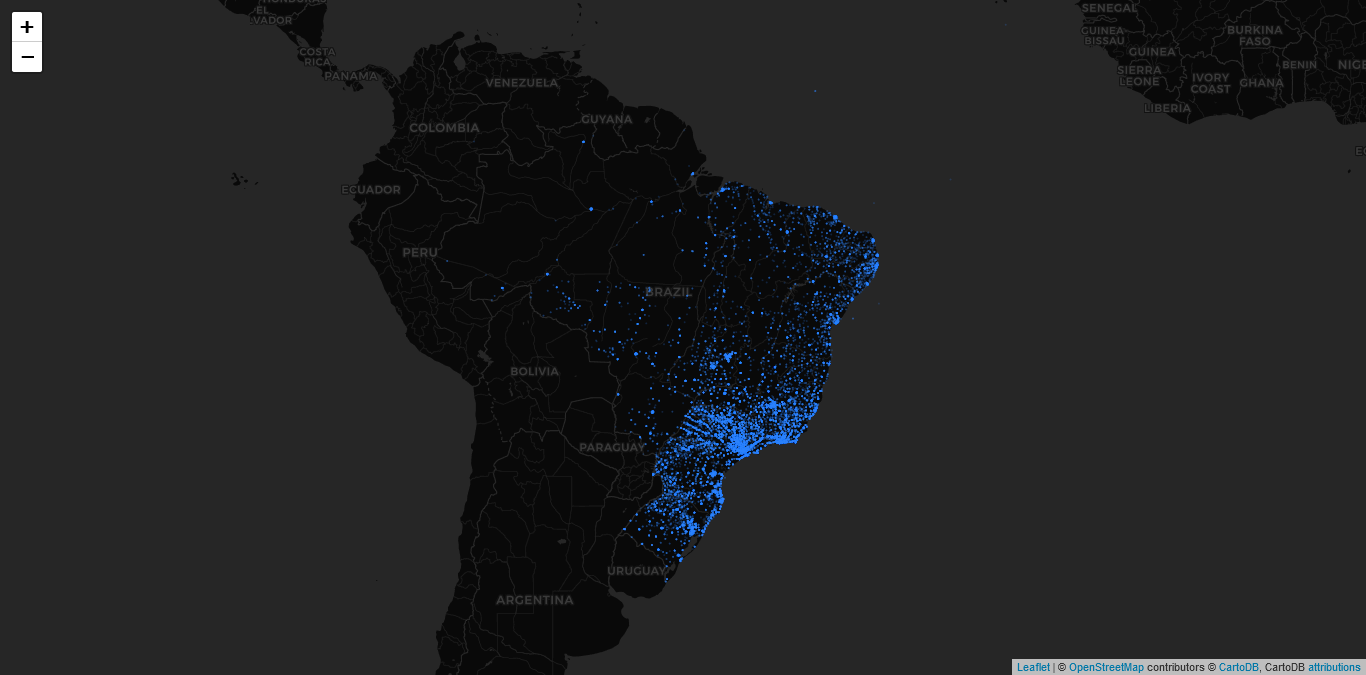

In [76]:
# Exportation et visualisation en tant qu'image,
# evitant de mobiliser les ressources pour afficher les nombreux points
img_data = m._to_png()
img = Image.open(io.BytesIO(img_data))
img.save('figures/cust_map.png')
img

Nous visualisons la localisation des vendeurs.

In [77]:
m = map_indicator(
    data_dict['olist_sellers_dataset']['geolocation_lat'],
    data_dict['olist_sellers_dataset']['geolocation_lng'],
    anchor_coordinate,
    map_kwargs={'zoom_start': 4, 'tiles': "CartoDB dark_matter"},
    circle_kwargs={'radius': 5, 'fill': True,
                   'fillOpacity': .3, "weight": 0})

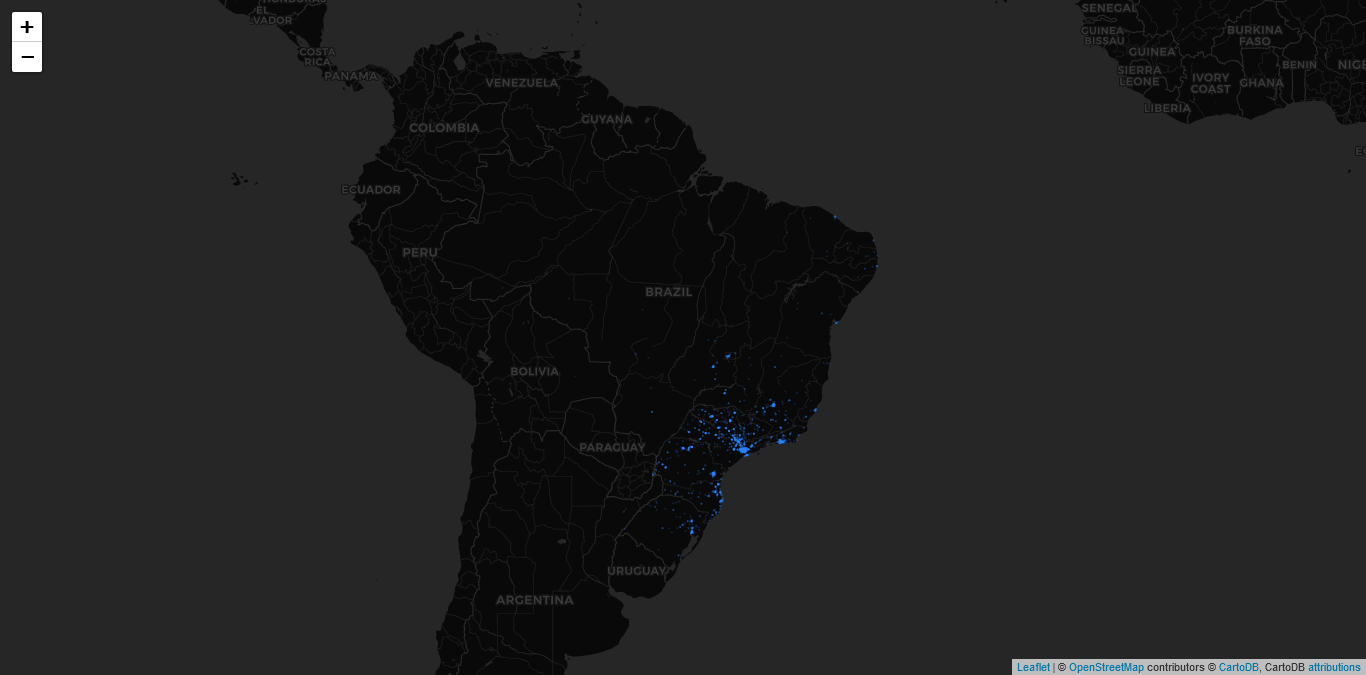

In [78]:
img_data = m._to_png()
img = Image.open(io.BytesIO(img_data))
img.save('figures/sell_map.png')
img

## 2.3. Enrichissement de la base des produits commandés

In [79]:
data_dict['olist_order_items_dataset'] = \
    pd.merge(left=data_dict['olist_order_items_dataset'],
             right=data_dict['olist_products_dataset'],
             how='left',
             on='product_id')

In [80]:
data_dict['olist_order_items_dataset'] = \
    pd.merge(left=data_dict['olist_order_items_dataset'],
             right=data_dict['olist_sellers_dataset'],
             how='left',
             on='seller_id')

In [81]:
data_dict['olist_order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_vol_cm3,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,3528.0,cool_stuff,27277,volta redonda,SP,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,60000.0,pet_shop,3471,sao paulo,SP,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,14157.0,furniture_decor,37564,borda da mata,MG,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,2400.0,perfumery,14403,franca,SP,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,42000.0,garden_tools,87900,loanda,PR,-22.929384,-53.135873


## 2.4. Enrichissement de la base des commandes

In [82]:
data_dict['olist_orders_dataset'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_purchase_to_delivery,order_purchase_hour,order_purchase_day,order_purchase_month,order_purchase_year,d_christmas,d_valentines,d_mothers,d_fathers,d_children
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,15,10,0,10,2017,False,False,False,False,True
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,19,20,1,7,2018,False,False,False,False,False
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,26,8,2,8,2018,False,False,True,False,False
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,26,19,5,11,2017,False,False,False,False,False
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,12,21,1,2,2018,False,False,False,False,False


La base de données `olist_orders_dataset`, contenant des informations générales relatives aux commandes, est liée à trois autres bases de données contenant des informations complémentaires sur les commandes passées. Cette première base contient une entrée unique par commande, et nous allons dans un premier temps nous attacher à adapter les trois bases liées pour qu'il en soit de même.

Nous pouvons déjà cependant retirer les variables qui ne serviront pas à la catégorisation client.

In [83]:
data_orders = data_dict['olist_orders_dataset'].copy()
data_orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_purchase_to_delivery', 'order_purchase_hour',
       'order_purchase_day', 'order_purchase_month', 'order_purchase_year',
       'd_christmas', 'd_valentines', 'd_mothers', 'd_fathers', 'd_children'],
      dtype='object')

In [84]:
drop_cols = ['order_status',
             'order_approved_at',
             'order_delivered_carrier_date',
             'order_delivered_customer_date',
             'order_estimated_delivery_date']

In [85]:
data_orders.drop(columns=drop_cols, inplace=True)

### 2.4.1. Produits commandés

In [86]:
data_dict['olist_order_items_dataset'].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,product_length_cm,product_height_cm,product_width_cm,product_vol_cm3,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,28.0,9.0,14.0,3528.0,cool_stuff,27277,volta redonda,SP,-22.496953,-44.127492
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,50.0,30.0,40.0,60000.0,pet_shop,3471,sao paulo,SP,-23.565096,-46.518565
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,33.0,13.0,33.0,14157.0,furniture_decor,37564,borda da mata,MG,-22.262584,-46.171124
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,16.0,10.0,15.0,2400.0,perfumery,14403,franca,SP,-20.553624,-47.387359
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,35.0,40.0,30.0,42000.0,garden_tools,87900,loanda,PR,-22.929384,-53.135873


La base de données `olist_order_items_dataset` contient des informations sur les produits commandés. Certaines commandes peuvent naturellement contenir plus d'un produit. Afin d'obtenir une information unique par commande, en conservant les éléments utiles, nous allons procéder par étapes : 
- One-hot encoding des catégorie de produits
- Par commande, somme des variables numériques pour lesquelles cela a un sens : prix des produits, coût de livraison, volume, poids, catégorie après encoding
- Par commande, prise en compte de la moyenne de variables numériques pour lesquelles cela peut avoir un sens : longueur de la description du produit, nom du produit, dimensions, géolocalisation du vendeur
- Par commande, prise en compte du nombre de produits total
- Elimination des autres variables

In [87]:
data_dict['olist_order_items_dataset'].columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_vol_cm3', 'product_category_name_english',
       'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_lat', 'geolocation_lng'],
      dtype='object')

In [88]:
data_items = data_dict['olist_order_items_dataset'].copy()

In [89]:
data_items = pd.get_dummies(
    data=data_items,
    prefix='prod_cat',
    columns=['product_category_name_english']
)

In [90]:
sum_vars = ['price',
            'freight_value',
            'product_weight_g',
            'product_vol_cm3'] +\
    data_items.columns[data_items.columns.str.startswith('prod_cat')].tolist()

mean_vars = ['product_name_lenght',
             'product_description_lenght',
             'product_length_cm',
             'product_height_cm',
             'product_width_cm',
             'geolocation_lat',
             'geolocation_lng']

max_vars = ['order_item_id']

In [91]:
agg_dict = {}
for var in sum_vars:
    agg_dict[var] = 'sum'

for var in mean_vars:
    agg_dict[var] = 'mean'

for var in max_vars:
    agg_dict[var] = 'max'

In [92]:
data_items = data_items.groupby(
    'order_id', as_index=False).agg(agg_dict)
data_items.head()

,order_id,price,freight_value,product_weight_g,product_vol_cm3,prod_cat_agro_industry_and_commerce,prod_cat_air_conditioning,prod_cat_art,prod_cat_arts_and_craftmanship,prod_cat_audio,...,prod_cat_toys,prod_cat_watches_gifts,product_name_lenght,product_description_lenght,product_length_cm,product_height_cm,product_width_cm,geolocation_lat,geolocation_lng,order_item_id
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,650.0,3528.0,0,0,0,0,0,...,0,0,58.0,598.0,28.0,9.0,14.0,-22.496953,-44.127492,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,30000.0,60000.0,0,0,0,0,0,...,0,0,56.0,239.0,50.0,30.0,40.0,-23.565096,-46.518565,1
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,3050.0,14157.0,0,0,0,0,0,...,0,0,59.0,695.0,33.0,13.0,33.0,-22.262584,-46.171124,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,200.0,2400.0,0,0,0,0,0,...,0,0,42.0,480.0,16.0,10.0,15.0,-20.553624,-47.387359,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,3750.0,42000.0,0,0,0,0,0,...,0,0,59.0,409.0,35.0,40.0,30.0,-22.929384,-53.135873,1


### 2.4.2. Commentaires laissés

In [93]:
data_dict['olist_order_reviews_dataset'].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


La base de données `olist_order_reviews_dataset` contient des informations sur les notes et commentaires laissés après l'achat de produits. Pour les commandes contenant plusieurs produits, plus d'un commentaire peut apparaître. Nous allons donc chercher à regrouper ces éléments par commande :
- Score moyen, minimal, et maximal par commande
- Nombre de commentaires par commande

In [94]:
agg_dict = {}
agg_dict['review_score'] = ['mean', 'min', 'max']
agg_dict['review_id'] = 'count'

In [95]:
# Regroupement par numero de commande, et extraction
# de la moyenne des notes et de la presence d'un commentaire
data_reviews =\
    data_dict['olist_order_reviews_dataset']\
    .groupby('order_id', as_index=False).agg(agg_dict)

In [96]:
# Retrait d'un niveau de colonnes
data_reviews.columns =\
    data_reviews.columns.droplevel(1)+'_'+data_reviews.columns.droplevel(0)

data_reviews.rename(
    columns={
        'order_id_': 'order_id'},
    inplace=True)

data_reviews.head()

,order_id,review_score_mean,review_score_min,review_score_max,review_id_count
0,00010242fe8c5a6d1ba2dd792cb16214,5.0,5,5,1
1,00018f77f2f0320c557190d7a144bdd3,4.0,4,4,1
2,000229ec398224ef6ca0657da4fc703e,5.0,5,5,1
3,00024acbcdf0a6daa1e931b038114c75,4.0,4,4,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0,5,5,1


### 2.4.3. Moyens de paiement utilisés

In [97]:
data_dict['olist_order_payments_dataset'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Une commande peut être réglée au travers de plusieurs moyens de paiement. Afin de garder une information utile, nous allons utiliser un pivot pour obtenir, pour chaque commande, le détail en une ligne des montants par moyen de paiement utilisé. Dans un second temps, nous extrairons le nombre de moyens de paiement par commande, et le nombre total de mensualités.

In [98]:
# Pivot sur les moyens de paiement
types_pivot = data_dict['olist_order_payments_dataset']\
    .pivot_table(columns='payment_type',
                 values='payment_value',
                 index='order_id',
                 aggfunc='sum',
                 fill_value=0,
                 sort=False)
types_pivot.reset_index(inplace=True)
types_pivot.head()

payment_type,order_id,boleto,credit_card,debit_card,not_defined,voucher
0,b81ef226f3fe1789b1e8b2acac839d17,0.0,99.33,0.0,0,0.0
1,a9810da82917af2d9aefd1278f1dcfa0,0.0,24.39,0.0,0,0.0
2,25e8ea4e93396b6fa0d3dd708e76c1bd,0.0,65.71,0.0,0,0.0
3,ba78997921bbcdc1373bb41e913ab953,0.0,107.78,0.0,0,0.0
4,42fdf880ba16b47b59251dd489d4441a,0.0,128.45,0.0,0,0.0


In [99]:
# Extraction des autres donnees par commande
data_payments = data_dict['olist_order_payments_dataset'].copy()
data_payments = data_payments[
    ['order_id', 'payment_sequential', 'payment_installments']]\
    .groupby('order_id', as_index=False).max()
data_payments.head()

,order_id,payment_sequential,payment_installments
0,00010242fe8c5a6d1ba2dd792cb16214,1,2
1,00018f77f2f0320c557190d7a144bdd3,1,3
2,000229ec398224ef6ca0657da4fc703e,1,5
3,00024acbcdf0a6daa1e931b038114c75,1,2
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3


In [100]:
# Jointure des deux tables sur la cle order_id
data_payments = pd.merge(
    left=data_payments,
    right=types_pivot,
    how='left',
    on='order_id'
)
data_payments.head()

,order_id,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,00010242fe8c5a6d1ba2dd792cb16214,1,2,0.0,72.19,0.0,0,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,3,0.0,259.83,0.0,0,0.0
2,000229ec398224ef6ca0657da4fc703e,1,5,0.0,216.87,0.0,0,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,2,0.0,25.78,0.0,0,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,3,0.0,218.04,0.0,0,0.0


### 2.4.4. Jointure des tables

Nous pouvons désormais enrichir la base des commandes à l'aide des autres bases de données, qui contiennent désormais au plus une entrée par `order_id`, la clé qui lie ces bases entre elles.

In [101]:
for data in [data_items, data_reviews, data_payments]:

    data_orders = pd.merge(
        left=data_orders,
        right=data,
        how='left',
        on='order_id')

data_orders.head()

,order_id,customer_id,order_purchase_timestamp,order_purchase_to_delivery,order_purchase_hour,order_purchase_day,order_purchase_month,order_purchase_year,d_christmas,d_valentines,...,review_score_min,review_score_max,review_id_count,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,15,10,0,10,2017,False,False,...,4.0,4.0,1.0,3.0,1.0,0.00,18.12,0.0,0.0,20.59
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24 20:41:37,19,20,1,7,2018,False,False,...,4.0,4.0,1.0,1.0,1.0,141.46,0.00,0.0,0.0,0.00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08 08:38:49,26,8,2,8,2018,False,False,...,5.0,5.0,1.0,1.0,3.0,0.00,179.12,0.0,0.0,0.00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,2017-11-18 19:28:06,26,19,5,11,2017,False,False,...,5.0,5.0,1.0,1.0,1.0,0.00,72.20,0.0,0.0,0.00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,2018-02-13 21:18:39,12,21,1,2,2018,False,False,...,5.0,5.0,1.0,1.0,1.0,0.00,28.62,0.0,0.0,0.00


## 2.5. Enrichissement de la base clients

### 2.5.1. Intégration des données des commandes

Nous commençons par joindre la base de commandes enrichie à la base clients, à l'aide de la clé `customer_id`.

In [102]:
data_cust = pd.merge(
    left=data_dict['olist_customers_dataset'],
    right=data_orders,
    how='left',
    on='customer_id',
    suffixes=(None, '_order'))

data_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,order_id,order_purchase_timestamp,order_purchase_to_delivery,...,review_score_min,review_score_max,review_id_count,payment_sequential,payment_installments,boleto,credit_card,debit_card,not_defined,voucher
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.498489,-47.396929,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,19,...,4.0,4.0,1.0,1.0,2.0,0.0,146.87,0.0,0.0,0.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,-23.727992,-46.542848,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,24,...,5.0,5.0,1.0,1.0,8.0,0.0,335.48,0.0,0.0,0.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,-23.531642,-46.656289,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,24,...,5.0,5.0,1.0,1.0,7.0,0.0,157.73,0.0,0.0,0.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,-23.499702,-46.185233,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,27,...,5.0,5.0,1.0,1.0,1.0,0.0,173.30,0.0,0.0,0.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,-22.975100,-47.142925,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,16,...,5.0,5.0,1.0,1.0,8.0,0.0,252.25,0.0,0.0,0.0


Nous pouvons désormais travailler sur cette base complète.

Nous pouvons désormais également identifier le montant payé selon la date de la commande. Cela pourra en théorie nous permettre d'analyser les habitudes de dépenses des clients par la suite.

In [103]:
day_cols = data_cust.columns[data_cust.columns.str.startswith('d_')]
day_cols

Index(['d_christmas', 'd_valentines', 'd_mothers', 'd_fathers', 'd_children'], dtype='object')

In [104]:
for col in day_cols:
    mapping = data_cust[col] == True
    data_cust.loc[mapping, col] =\
        data_cust.loc[mapping, ['price', 'freight_value']].sum(axis=1)

In [105]:
# Conversion des colonnes en float
data_cust.loc[:, day_cols] = data_cust[day_cols].astype(float)

### 2.5.2. Traitement des valeurs manquantes

In [106]:
n_na = data_cust.isna().any(axis=1).sum()
display(Markdown(f"Notre base contient {n_na:,d}\
    lignes presentant des donnees manquantes."))

Notre base contient 1,525    lignes presentant des donnees manquantes.

Une source de ces données manquantes est l'absence de certaines commandes dans une ou plusieurs bases relatives aux commandes. Cela peut se vérifier en comparant les identifiants disponibles sur les différentes bases relatives aux commandes.

In [107]:
# Extraction de l'ensemble des identifiants de commandes
order_ids = data_cust['order_id'].unique().tolist()
# Comparaison a la base des commandes
data_compared = data_dict['olist_orders_dataset']
# Nombre de commandes presentes dans la base finale,
# mais pas dans la base source
len(
    set(order_ids) -
    set(data_compared['order_id'].unique().tolist())
)

0

Toutes les commandes présentes dans la base clients sont également présentes dans la base des commandes.

In [108]:
# Extraction de l'ensemble des identifiants de commandes
order_ids = data_cust['order_id'].unique().tolist()
# Comparaison a la base des produits, contenant notamment les prix par produits
data_compared = data_dict['olist_order_items_dataset']
# Nombre de commandes presentes dans la base finale,
# mais pas dans la base source
diff_list = list(
    set(order_ids) -
    set(data_compared['order_id'].unique().tolist()))
len(diff_list)

775

Certaines commandes présentes dans la base des commandes sont absentes de la base des produits commandés. Compte tenu du nombre limité de valeurs manquantes, et de la nécessité de "deviner" le contenu de la commande dans le cas contraire, nous les retirons de la base de données.

In [109]:
mapping = data_cust['order_id'].isin(diff_list)
data_cust = data_cust.loc[~mapping]

In [110]:
# Extraction de l'ensemble des identifiants de commandes
order_ids = data_cust['order_id'].unique().tolist()
# Comparaison a la base des moyens de paiements par commande
data_compared = data_dict['olist_order_payments_dataset']
# Nombre de commandes presentes dans la base finale,
# mais pas dans la base source
diff_list = list(
    set(order_ids) -
    set(data_compared['order_id'].unique().tolist()))
len(diff_list)

1

Nous pouvons tenter d'imputer les valeurs en ne considérant qu'un seul moyen de paiement, le mode de paiement le plus courant, et en attribuant la médiane du nombre de mensualités associées à celui-ci.

Les colonnes suivantes doivent être imputées.

In [111]:
mapping_row = data_cust['order_id'].isin(diff_list)
mapping_col = data_cust.loc[mapping_row].isna().sum() > 0

data_cust.loc[mapping_row, mapping_col].columns.tolist()

['payment_sequential',
 'payment_installments',
 'boleto',
 'credit_card',
 'debit_card',
 'not_defined',
 'voucher']

Nous identifions le mode de moyen le plus courant, le mode, au sein de notre échantillon.

In [112]:
mode_payment_type =\
    data_dict['olist_order_payments_dataset']['payment_type'].mode()[0]
mode_payment_type

'credit_card'

Nous pouvons maintenant identifier le mode du nombre de mensualités associé.

In [113]:
mapping = data_dict['olist_order_payments_dataset']['payment_type'] ==\
    mode_payment_type
mode_payment_installments = data_dict['olist_order_payments_dataset']\
    .loc[mapping, 'payment_installments'].mode()[0]
mode_payment_installments

1

Nous pouvons désormais imputer les valeurs manquantes.

In [114]:
# Imputation du nombre de moyens de paiement
data_cust.loc[mapping_row, 'payment_sequential']
# Imputation du moyen de paiement (cout total paye par ce moyen)
data_cust.loc[mapping_row, mode_payment_type] =\
    data_cust.loc[mapping_row, ['price', 'freight_value']].sum(axis=1)
# Imputation du nombre de mensualites
data_cust.loc[mapping_row, 'payment_installments'] =\
    mode_payment_installments
# Imputation des autres donnees par 0
data_cust.loc[mapping_row, mapping_col] =\
    data_cust.loc[mapping_row, mapping_col].fillna(value=0)

In [115]:
# Extraction de l'ensemble des identifiants de commandes
order_ids = data_cust['order_id'].unique().tolist()
# Comparaison a la base des commentaires par commande
data_compared = data_dict['olist_order_reviews_dataset']
# Nombre de commandes presentes dans la base finale,
# mais pas dans la base source
diff_list = list(
    set(order_ids) -
    set(data_compared['order_id'].unique().tolist()))
len(diff_list)

749

Certaines commandes n'apparaissent par dans la liste des commandes avec commentaires. Il est probable que le client n'ait pas souhaité laisser de note ni de commentaire. Nous tiendrons compte de ces cas par la suite, mais ne les excluons pas pour le moment.

In [116]:
# Extraction de l'ensemble des identifiants de produits
prod_ids = data_dict['olist_order_items_dataset']['product_id']\
    .unique().tolist()

In [117]:
# Extraction de l'ensemble des identifiants de produits
prod_ids = data_dict['olist_order_items_dataset']['product_id']\
    .unique().tolist()
# Comparaison a la base des moyens de paiements par commande
data_compared = data_dict['olist_products_dataset']
# Nombre de produits presents dans la base des produits commandes,
# mais pas dans la base source
diff_list = list(
    set(prod_ids) -
    set(data_compared['product_id'].unique().tolist()))
len(diff_list)

0

Les produits commandés se trouvent tous dans la base des produits.

Nous pouvons visualiser les données manquantes dans la base actuelle après ces traitements effectués. Ces données sont liées à la note ou au commentaire, que nous aborderons par la suite.

In [118]:
data_cust.isna().sum()[data_cust.isna().sum() > 0]

review_score_mean    749
review_score_min     749
review_score_max     749
review_id_count      749
dtype: int64

### 2.5.3. Distance de commande

Nous incluons dans cette base un indicateur correspondant à la distance séparant le vendeur (ou la moyenne des vendeurs de la commande) du client. Cela pourrait résulter en des catégories de clients ayant l'habitude de consommer local, par rapport à d'autres pour lesquels ce critère est moins important.

In [119]:
def geo_dist(data, geoloc_cols):
    '''
    Fonction calculant la distance geodesique pour
    un ensemble de paires de paires de coordonnees.

    Parametres :
    ------------
    - data : base de donnees contenant les coordonnees
    pour lesquelles une distance doit etre calculee
    - geoloc_cols : noms des colonnes contenant, dans l'ordre :
    latitude origine, longitude origine, latitude cible, longitude cible

    Resultat :
    ----------
    List de distances entre les points en km.
    '''

    assert len(geoloc_cols) == 4,\
        (f"Exactement 4 colonnes doivent etre renseignees,\
        or {len(geoloc_cols):d} sont indiquees dans geoloc_cols.")

    data = data.copy()

    # Etape de multithreading pour la fonction calculant
    # la distance geodesique entre 2 points
    pool = mp.Pool(mp.cpu_count()-1)

    iterable = zip(*[data[col] for col in geoloc_cols])

    distances = pool.starmap(distance.geodesic,
                             (((i[0], i[1]), (i[2], i[3])) for i in iterable))

    # Fin du multithreading
    pool.close()

    distances = [d.km for d in distances]

    return distances

In [120]:
geoloc_cols = data_cust.columns.copy()
geoloc_cols = geoloc_cols[geoloc_cols.str.startswith('geolocation_')]
geoloc_cols

Index(['geolocation_lat', 'geolocation_lng', 'geolocation_lat_order',
       'geolocation_lng_order'],
      dtype='object')

In [121]:
data_cust['order_distance'] = geo_dist(data_cust, geoloc_cols)

## 2.6. Finalisation

Nous pouvons désormais enregistrer la base de données ainsi créée.

In [122]:
data_cust.reset_index(inplace=True, drop=True)

In [123]:
# Enregistrement de la base de donnees clients
data_cust.to_parquet('data_wrangled/data_cust.parquet')